#### To track Crona VIRUS Spread across countries with personal local information
#### General information is not relevant for me I woud like to have a deep dive local development of the spread

In [6]:
import subprocess
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)

In [11]:
git_pull = subprocess.Popen( "/usr/bin/git pull" , 
                     cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()


print("Error : " + str(error)) 
print("out : " + str(out))

Error : b''
out : b'Already up to date.\n'


In [8]:
pd_raw = pd.read_csv('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [9]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782


In [10]:
pd_raw.shape

(274, 407)

In [32]:
time_idx = pd_raw.columns[4:]

In [33]:
df_plot = pd.DataFrame({
    'date': time_idx
})

In [34]:
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [35]:
len(pd_raw['Country/Region'].unique())

192

In [37]:
country_list = ['Italy', 'US', 'Canada', 'Spain', 'India', 'United Kingdom']

In [38]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:, 4::].sum(axis = 0))

In [39]:
df_plot

,date,Italy,US,Canada,Spain,India,United Kingdom
0,1/22/20,0,1,0,0,0,0
1,1/23/20,0,1,0,0,0,0
2,1/24/20,0,2,0,0,0,0
3,1/25/20,0,2,0,0,0,0
4,1/26/20,0,5,1,0,0,0
5,1/27/20,0,5,1,0,0,0
6,1/28/20,0,5,2,0,0,0
7,1/29/20,0,6,2,0,0,0
8,1/30/20,0,6,2,0,1,0
9,1/31/20,2,8,4,0,1,2


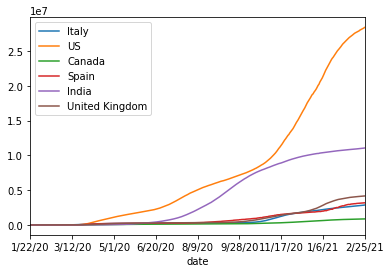

In [41]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [42]:
from datetime import datetime

In [43]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in df_plot.date]

In [45]:
time_str = [datetime.strftime(each, "%y-%m-%d") for each in time_idx]

In [47]:
df_plot['date'] = time_idx

In [52]:
df_plot.head()

,date,Italy,US,Canada,Spain,India,United Kingdom
0,2020-01-22,0,1,0,0,0,0
1,2020-01-23,0,1,0,0,0,0
2,2020-01-24,0,2,0,0,0,0
3,2020-01-25,0,2,0,0,0,0
4,2020-01-26,0,5,1,0,0,0


In [50]:
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [82]:
df_plot.to_csv('../data/processed/Covid_flat_table.csv', sep = ';', index=False)

## Relational Data Model

In [58]:
pd_raw = pd.read_csv('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [59]:
pd_data_base = pd_raw.rename(columns={'Country/Region': 'country', 'Province/State': 'state'})
pd_data_base['state'] = pd_data_base['state'].fillna('no')

In [60]:
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
0,no,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707
1,no,Albania,41.15330,20.168300,0,0,0,0,0,0,...,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215
2,no,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960
3,no,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849
4,no,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782


In [61]:
pd_data_base.drop(['Lat', 'Long'], axis=1, inplace=True)

In [62]:
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707
1,no,Albania,0,0,0,0,0,0,0,0,...,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215
2,no,Algeria,0,0,0,0,0,0,0,0,...,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960
3,no,Andorra,0,0,0,0,0,0,0,0,...,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849
4,no,Angola,0,0,0,0,0,0,0,0,...,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782


In [48]:
pd_relational_model = pd_data_base.set_index(['state', 'country']).T.stack(level=[0, 1]).reset_index().rename(columns = {'level_0': 'date', 0: 'confirmed'},)

In [64]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [65]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [66]:
pd_relational_model.to_csv('../data/processed/Covid_relational_confirmed.csv', sep = ';', index=False)

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,Anguilla,United Kingdom,0.0
2,2020-01-22,Anhui,China,1.0
3,2020-01-22,Aruba,Netherlands,0.0
4,2020-01-22,Australian Capital Territory,Australia,0.0


## Group-by apply

In [68]:
pd_JH_data = pd.read_csv('../data/processed/Covid_relational_confirmed.csv', sep = ';', parse_dates=[0])
pd_JH_data = pd_JH_data.sort_values('date', ascending = True).reset_index(drop = True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,Kosovo,0.0
2,2020-01-22,no,Kuwait,0.0
3,2020-01-22,no,Kyrgyzstan,0.0
4,2020-01-22,no,Laos,0.0


In [94]:
test_data = pd_JH_data[((pd_JH_data['country'] == 'US') |
                      (pd_JH_data['country'] == 'Canada')) &
                      (pd_JH_data['date'] > '2021-02-20')]

In [85]:
test_data

,date,state,country,confirmed
108603,2021-02-21,no,US,28134115.0
108650,2021-02-21,Manitoba,Canada,31386.0
108654,2021-02-21,New Brunswick,Canada,1424.0
108658,2021-02-21,Newfoundland and Labrador,Canada,926.0
108660,2021-02-21,Northwest Territories,Canada,47.0
108661,2021-02-21,Nova Scotia,Canada,1609.0
108662,2021-02-21,Nunavut,Canada,339.0
108663,2021-02-21,Ontario,Canada,298154.0
108664,2021-02-21,Prince Edward Island,Canada,114.0
108666,2021-02-21,Quebec,Canada,282122.0


In [86]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Canada,2021-02-28,Yukon,306057.0
US,2021-02-28,no,28605669.0


In [92]:
# %load ../src/features/build_features.py
import numpy as np

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''
    
    y = np.array(in_array['confirmed'])
    X = np.arange(len(y)).reshape(-1, 1)
    
    #assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_
    
    return intercept/slope


In [95]:
test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

/Users/iamgrewal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/iamgrewal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/Users/iamgrewal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/Users/iamgrewal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/Users/iamgrewal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


state                      country
Alberta                    Canada      [362.2032196470899]
British Columbia           Canada     [170.79487247538424]
Diamond Princess           Canada                    [nan]
Grand Princess             Canada                    [inf]
Manitoba                   Canada     [478.03098948894524]
New Brunswick              Canada     [1406.3411764705882]
Newfoundland and Labrador  Canada     [109.62097902097904]
Northwest Territories      Canada                    [inf]
Nova Scotia                Canada     [309.93103448275866]
Nunavut                    Canada     [170.42941176470595]
Ontario                    Canada     [255.18288890021924]
Prince Edward Island       Canada     [54.526315789473685]
Quebec                     Canada     [348.46177262099087]
Repatriated Travellers     Canada                    [inf]
Saskatchewan               Canada     [190.02752293577984]
Yukon                      Canada                    [inf]
no                   